![](https://t4.ftcdn.net/jpg/03/14/89/01/360_F_314890127_SLLyUi2xodF1LxuPoe34fIn4AJT84J2N.jpg)

In [2]:
#importing required libraries
#numpy to do scientific calculation in python
import numpy as np
#pandas library is used to handle and manipulate the dataset
import pandas as pd
#matplot is used for visualization
import matplotlib.pyplot as plt
#seaborn used for visualization
import seaborn as sns
#warnings library removes the warnings
import warnings
warnings.filterwarnings('ignore')
#this library is used for mathematical calculation
import math

In [3]:
#Loading the dataset
#Making the Id column as index instead of droping it later 
df=pd.read_csv('data.csv', index_col='Id')

In [4]:
#The dataset
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Basic Checks on the Dataset

In [5]:
#head of the dataset
#shows the first 5 rows of the dataset
pd.options.display.max_columns=None
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#tail of the dataset
#shows the last 5 rows of the dataset
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
#to show number of rows and column in the dataset
df.shape

(1460, 80)

This Data set has 1460 rows and 80 columns

In [8]:
#to look at the statistical summary for all features
df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

In [9]:
#checking duplicate values
df.duplicated().sum()

0

# Datatype Correction

In [10]:
#this shows the summary of te dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
#the dataset
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Handling Missing values

In [12]:
#shows all the rows with restriction
#pd.options.display.max_rows=None
#checking all the null values in the dataset
nv=df.isnull().sum()
nv

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [13]:
#shows only the null values features
print(nv[nv>0],"\n")
print('There are total',len(nv[nv>0]),'columns with Missing Values')

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 

There are total 19 columns with Missing Values


In [14]:
#shows all together the total missing values in the dataset.
df.isnull().sum().sum()

6965

In [15]:
#shows the missing values
#The missing values has been order in descending order
nv[nv>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [16]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)

In [17]:
#sorting the null values in the descending order for better handling
nvp[nvp>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [18]:
#handling the missing values 
#as removing the null values is not a good practice
#and we might lose datas
df['PoolQC']=df['PoolQC'].fillna('No Pool')
df["MiscFeature"]=df["MiscFeature"].fillna('No MiscFeatures')
df['Alley']=df['Alley'].fillna('No Alley')
df['Fence']=df['Fence'].fillna('No Fence')
df['FireplaceQu']=df['FireplaceQu'].fillna('No Fireplace ')

In [19]:
#this code helps to stop the showing all the rows and columns 
#in order to reduced the computational charge
pd.reset_option('max_columns')
pd.reset_option('max_rows')

In [20]:
#percentage of the null data
#after handling the null values
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [21]:
#checking the dataset after handling the null values
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No MiscFeatures,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,No MiscFeatures,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No MiscFeatures,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,No MiscFeatures,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,No MiscFeatures,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No MiscFeatures,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,No MiscFeatures,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500


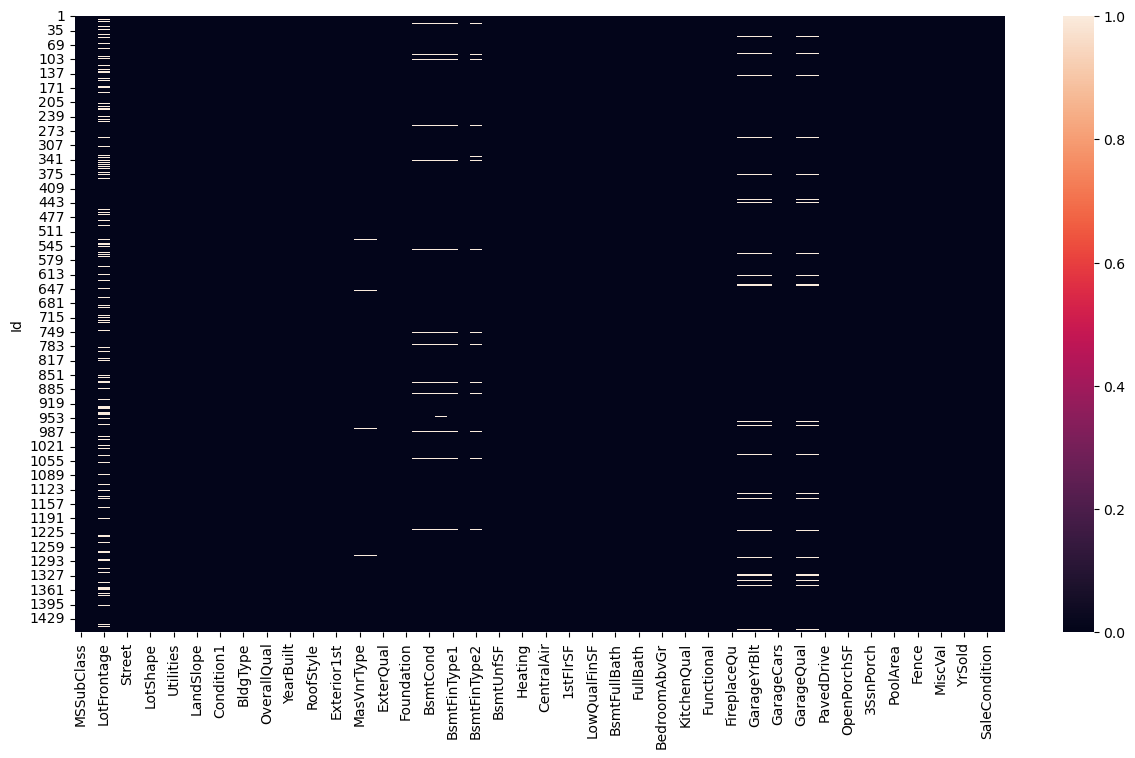

In [22]:
#chceking the null values
#using the heatmap from seaborn library
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=(15,8)
sns.heatmap(df.isnull())
plt.show()

In [23]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)[1:6]

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [24]:
#handling the missing values 
df['GarageType']=df['GarageType'].fillna('No Garage')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageFinish']=df['GarageFinish'].fillna('No Garage')
df['GarageQual']=df['GarageQual'].fillna('No Garage')
df['GarageCond']=df['GarageCond'].fillna('No Garage')

In [25]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

LotFrontage     17.739726
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [26]:
pd.options.display.max_columns=None
#chceking the values after handling the missing values
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No MiscFeatures,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,No MiscFeatures,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,6

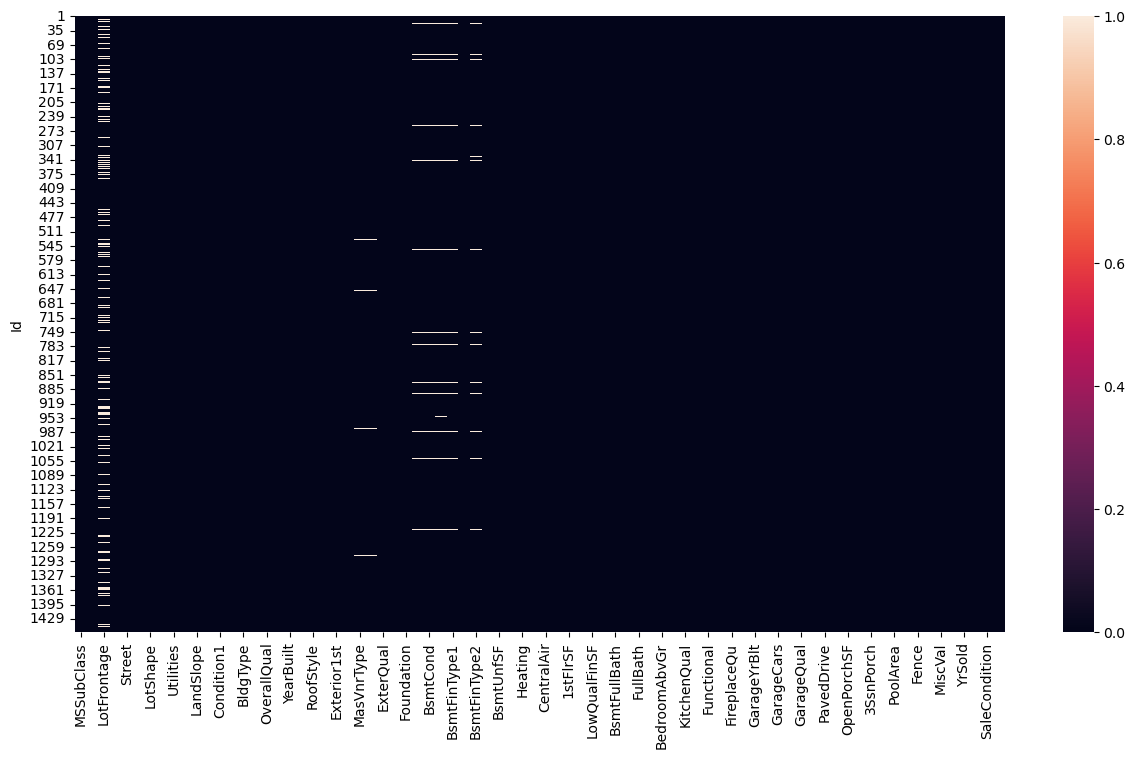

In [27]:
#checking the null values
#using the heatmap from seaborn library
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=(15,8)
sns.heatmap(df.isnull())
plt.show()

In [28]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,5,2007,WD,Normal,181500


In [29]:
#handling missing values for basement category
df['BsmtExposure']=df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('No Basement')
df['BsmtQual']=df['BsmtQual'].fillna('No Basement')
df['BsmtCond']=df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('No Basement')

In [30]:
#checking the missing values in percentage
nvp=df.isnull().sum()*100/len(df)

In [31]:
#checking the remaining missing values in percentage
nvp[nvp>0].sort_values(ascending=False)

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [32]:
#handling the missing values for masonry 
df['MasVnrType']=df['MasVnrType'].fillna('No Masonry')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [33]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,5,2007,WD,Normal,181500


In [34]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

LotFrontage    17.739726
Electrical      0.068493
dtype: float64

In [35]:
#checking the unique values for LotFrontage
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [36]:
df[df['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,No Alley,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,No Fireplace,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,No Pool,No Fence,No MiscFeatures,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,No Pool,GdWo,No MiscFeatures,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,Shed,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,No Pool,MnPrv,No MiscFeatures,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,No Pool,No Fence,No MiscFeatures,0,4,2007,WD,Normal,182900
1432,120,RL,NaN,4928,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,10,2009,WD,Normal,143750
1442,120,RM,NaN,4426,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,

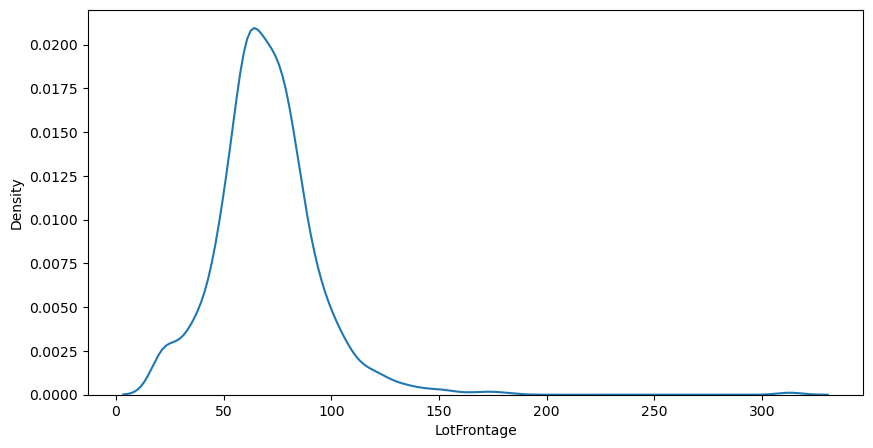

In [37]:
#plotting kdeplot to check the skewness
plt.figure(figsize=(10,5))
sns.kdeplot(df['LotFrontage'])
plt.show()

In [38]:
#handling the missing values in LotFrontage using median values of LotFrontage
df['LotFrontage']=df["LotFrontage"].fillna(df['LotFrontage'].median())

In [39]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

Electrical    0.068493
dtype: float64

In [40]:
#unique values in Electrical
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [41]:
df.isnull().sum()[df.isnull().sum()>0]

Electrical    1
dtype: int64

In [42]:
#The missing value in this Electrical
df[df['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,No MiscFeatures,0,5,2008,WD,Normal,167500


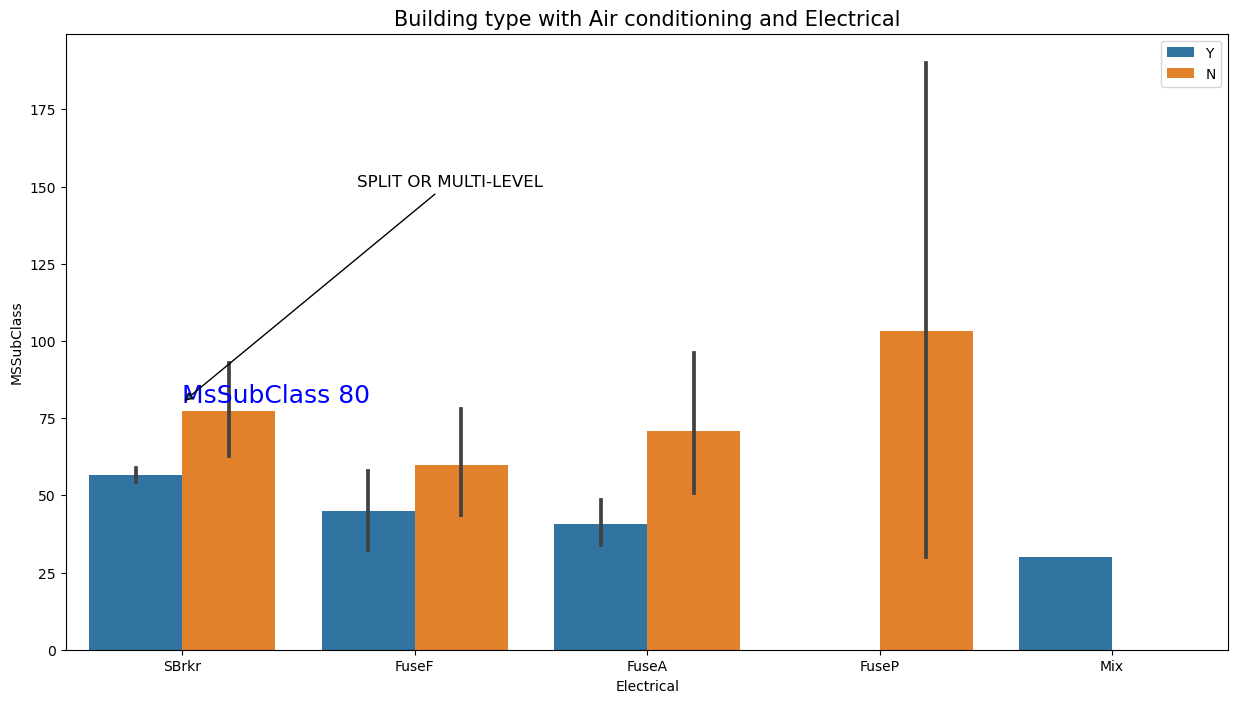

In [43]:
#The missing Values of Electrical
sns.barplot(x=df["Electrical"],hue=df['CentralAir'],y=df['MSSubClass'])
plt.legend(loc=1)
plt.title('Building type with Air conditioning and Electrical',fontsize=15)
plt.annotate('MsSubClass 80',xy=(0,80),fontsize=18,color='b')
plt.annotate('SPLIT OR MULTI-LEVEL',xy=(0,80),xytext=(0.75,150),arrowprops={'arrowstyle':'-|>'}, fontsize=12,)
plt.show()

In [44]:
#Comparing between the Electrical and MsSubClass
pd.crosstab(df['Electrical'],df['MSSubClass'],margins=True)

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190,All
Electrical,,,,,,,,,,,,,,,,
FuseA,31,18,2,3,20,0,8,2,0,0,5,0,0,0,5,94
FuseF,5,4,0,2,8,0,2,0,1,0,4,0,0,0,1,27
FuseP,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,3
Mix,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
SBrkr,500,45,2,7,116,299,50,14,56,20,42,87,63,10,23,1334
All,536,69,4,12,144,299,60,16,57,20,52,87,63,10,30,1459


In [45]:
#Unique features of Electrical Feature
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [46]:
#most frequent value in Electrical
df["Electrical"].mode()

0    SBrkr
Name: Electrical, dtype: object

In [47]:
#Handling the Electrical missing value with mode value
df['Electrical']=df['Electrical'].fillna("SBrkr")

In [48]:
#percentage of the null data
nvp=df.isnull().sum()*100/len(df)
#sorting the values in desceding order for better analysis
nvp[nvp>0].sort_values(ascending=False)

Series([], dtype: float64)

In [49]:
#checking the total missing value for the dataset 
df.isnull().sum().sum()

0

### **1.All the Missing values has been handled**
### **2.No data is removed**
### **3.There is no loss in data**

# Feature Analysis

# Feature Selection

In [50]:
#Getting the most important features
corr_mat = df.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(22)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
GarageYrBlt     0.261366
BsmtFullBath    0.227122
Name: SalePrice, dtype: float64

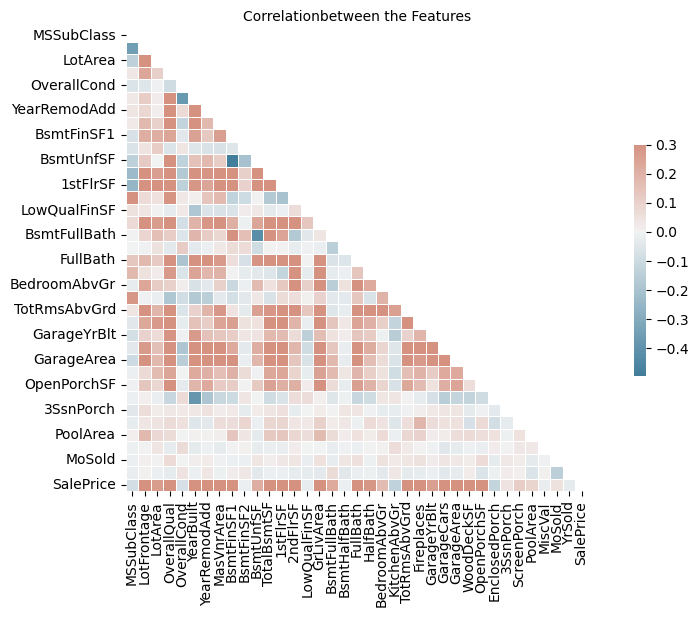

In [51]:
#Checking the correrealtion between the features
corr = df.corr() # We already examined SalePrice correlations
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlationbetween the Features',fontsize=10)

plt.show()

In [52]:
#looking at the important features using Recursive Feature Elimination and Linear Regression
#only the NUMERICAL FEATURES
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(df.fillna(0).select_dtypes(exclude='object'),df['SalePrice'])
selectedFeatures = list(
    df.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'SalePrice']

# Univariate Analysis

### Sales Price (Target Variable)

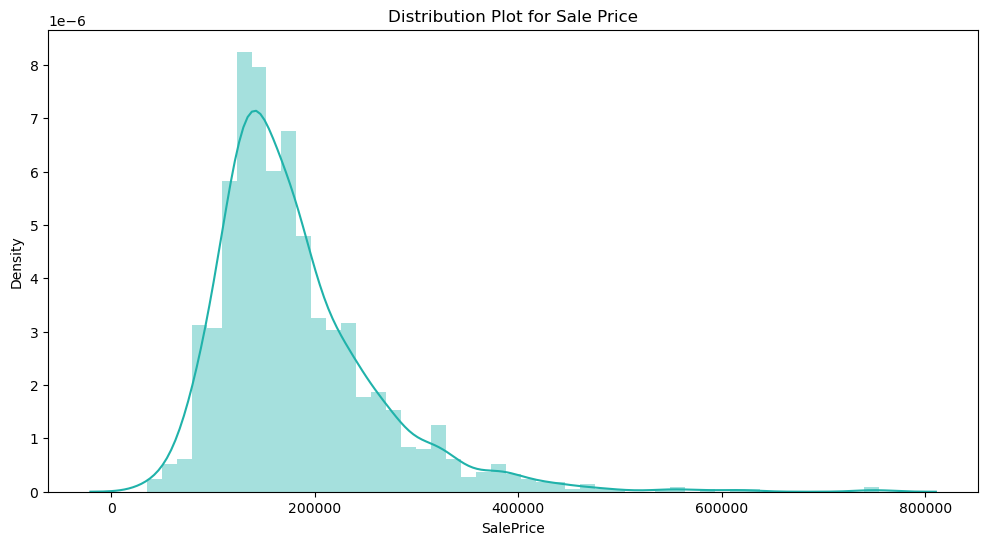

In [53]:
#plotting Distribution plot for SalePrice feature
plt.figure(figsize=(12,6))
plt.title('Distribution Plot for Sale Price')
sns.distplot(df["SalePrice"],color='lightseagreen')
plt.show()

###  Overall Quality of the House

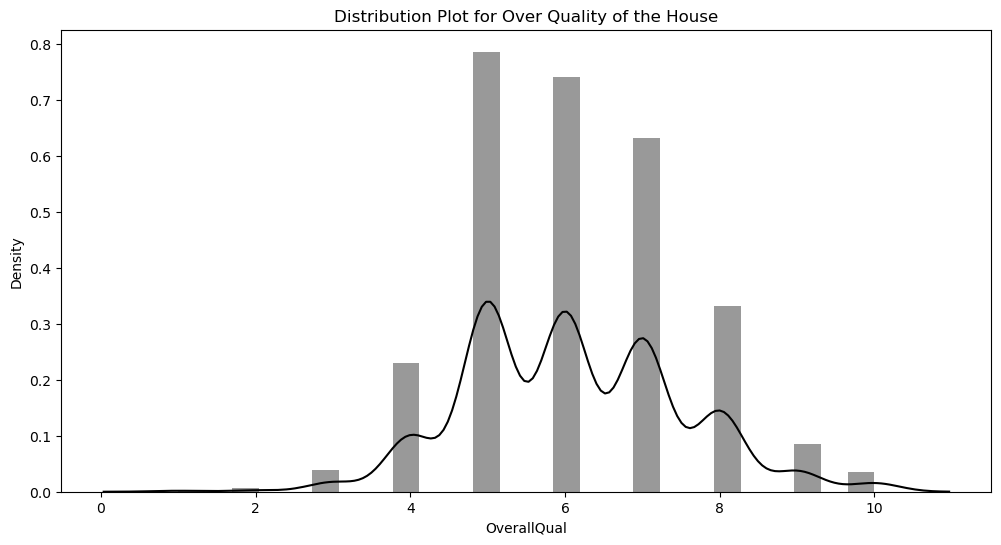

In [54]:
#plotting Distribution plot for Overall Quality of the House feature
plt.figure(figsize=(12,6))
plt.title('Distribution Plot for Over Quality of the House')
sns.distplot(df["OverallQual"],color='black')
plt.show()

In [55]:
df["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### Overall Condition Of the House

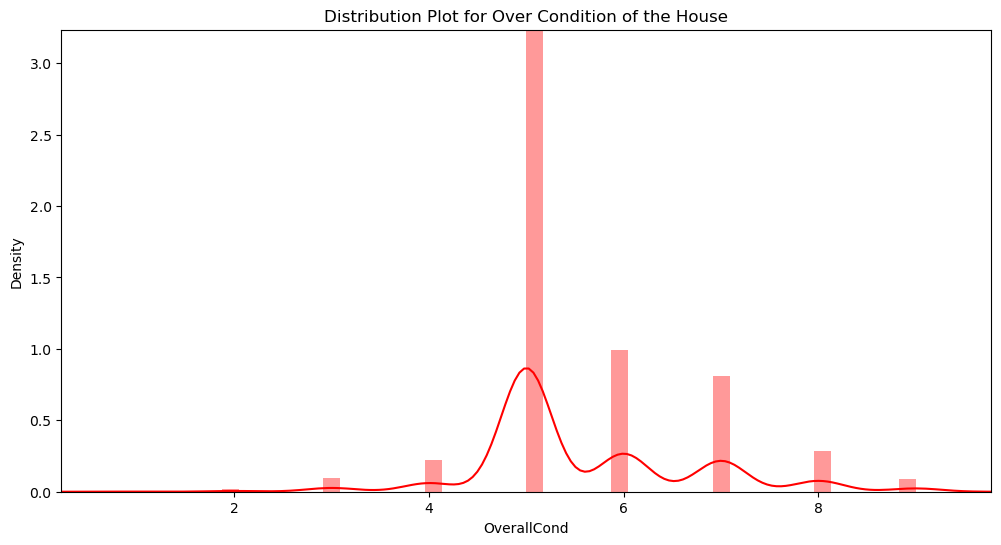

In [56]:
#plotting Distribution plot for Overall Condition of the House feature
plt.figure(figsize=(12,6))
plt.margins(x=0,y=0)
plt.title('Distribution Plot for Over Condition of the House')
sns.distplot(df["OverallCond"],color='red')
plt.show()

### GrLivArea

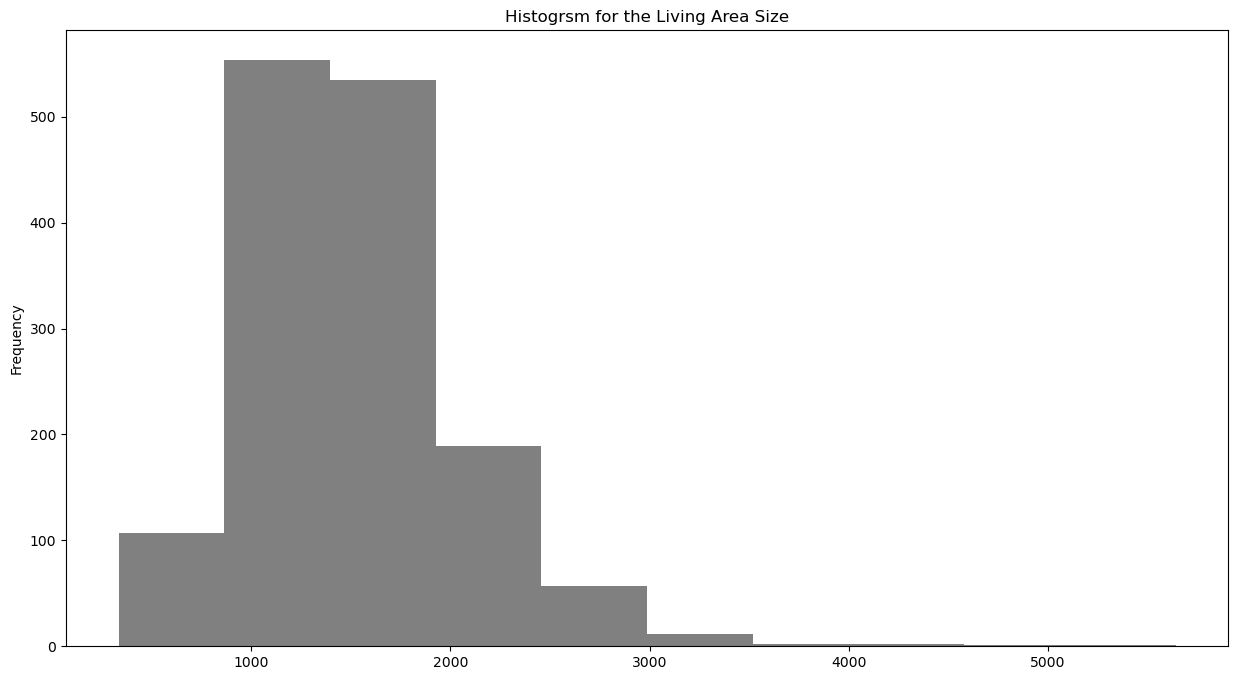

In [57]:
#plotting a Histogram using the Matplotlib library
#Living Area in Square feet
df['GrLivArea'].plot(kind='hist',color='grey')
plt.title('Histogrsm for the Living Area Size')
plt.show()

# Basement Bathroom

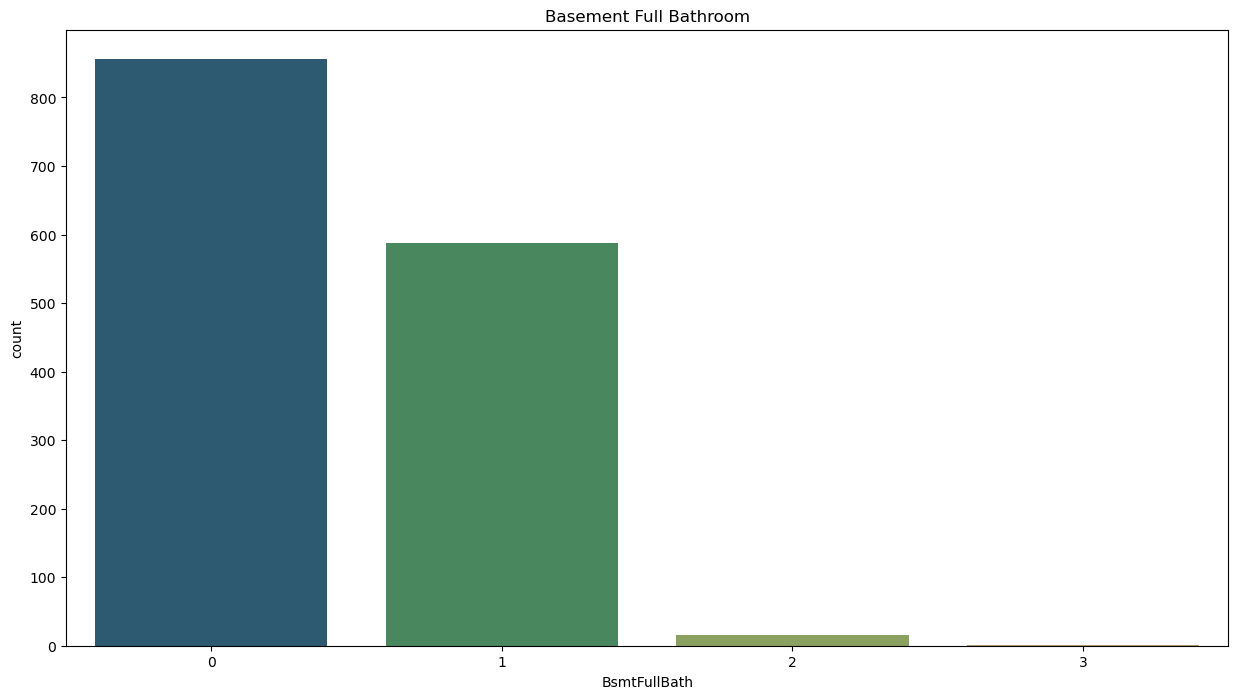

In [58]:
#plotting countplot for the basement bathroom Feature
sns.countplot( df['BsmtFullBath'],palette='gist_earth')
plt.title('Basement Full Bathroom')
plt.show()

In [59]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

# Capacity of the Car Garage

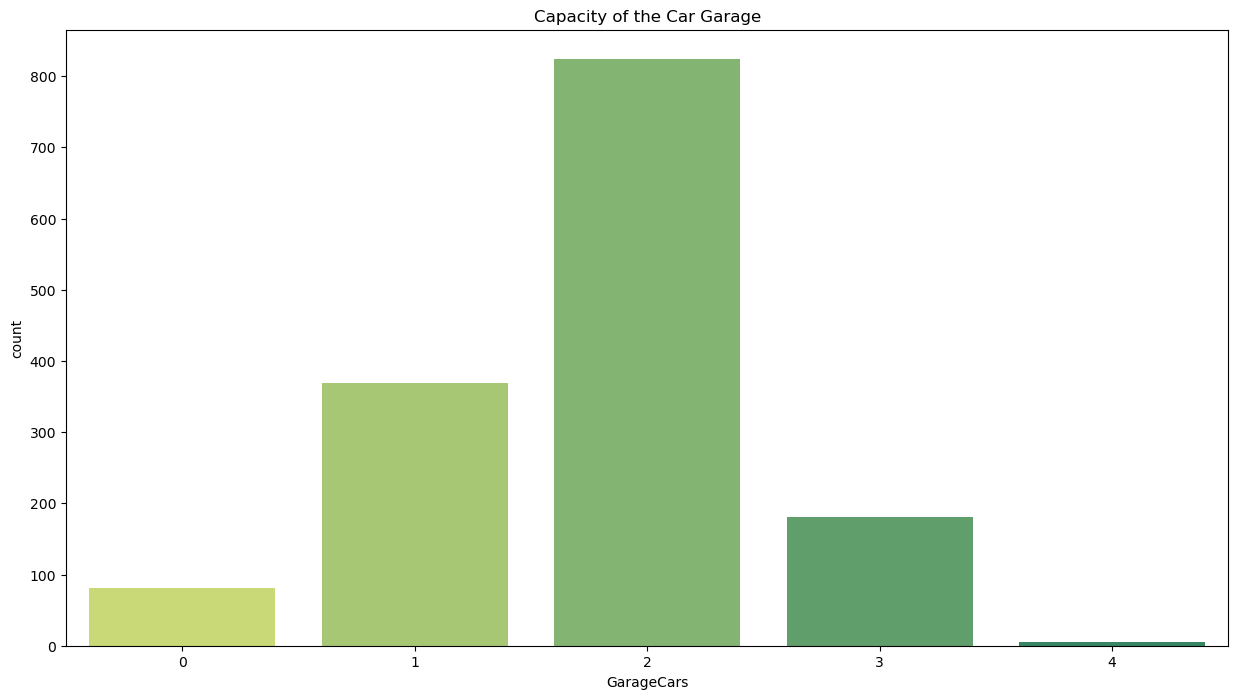

In [60]:
#plotting countplot for Garage Cars
sns.countplot(df["GarageCars"],palette='summer_r')
plt.title('Capacity of the Car Garage')
plt.show()

In [61]:
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

From the graph we get to know that .In most of the Houses in Ames the Garage Capacity is 2,
Were in there Garage 2 Cars can be parked.

# LotFrontage

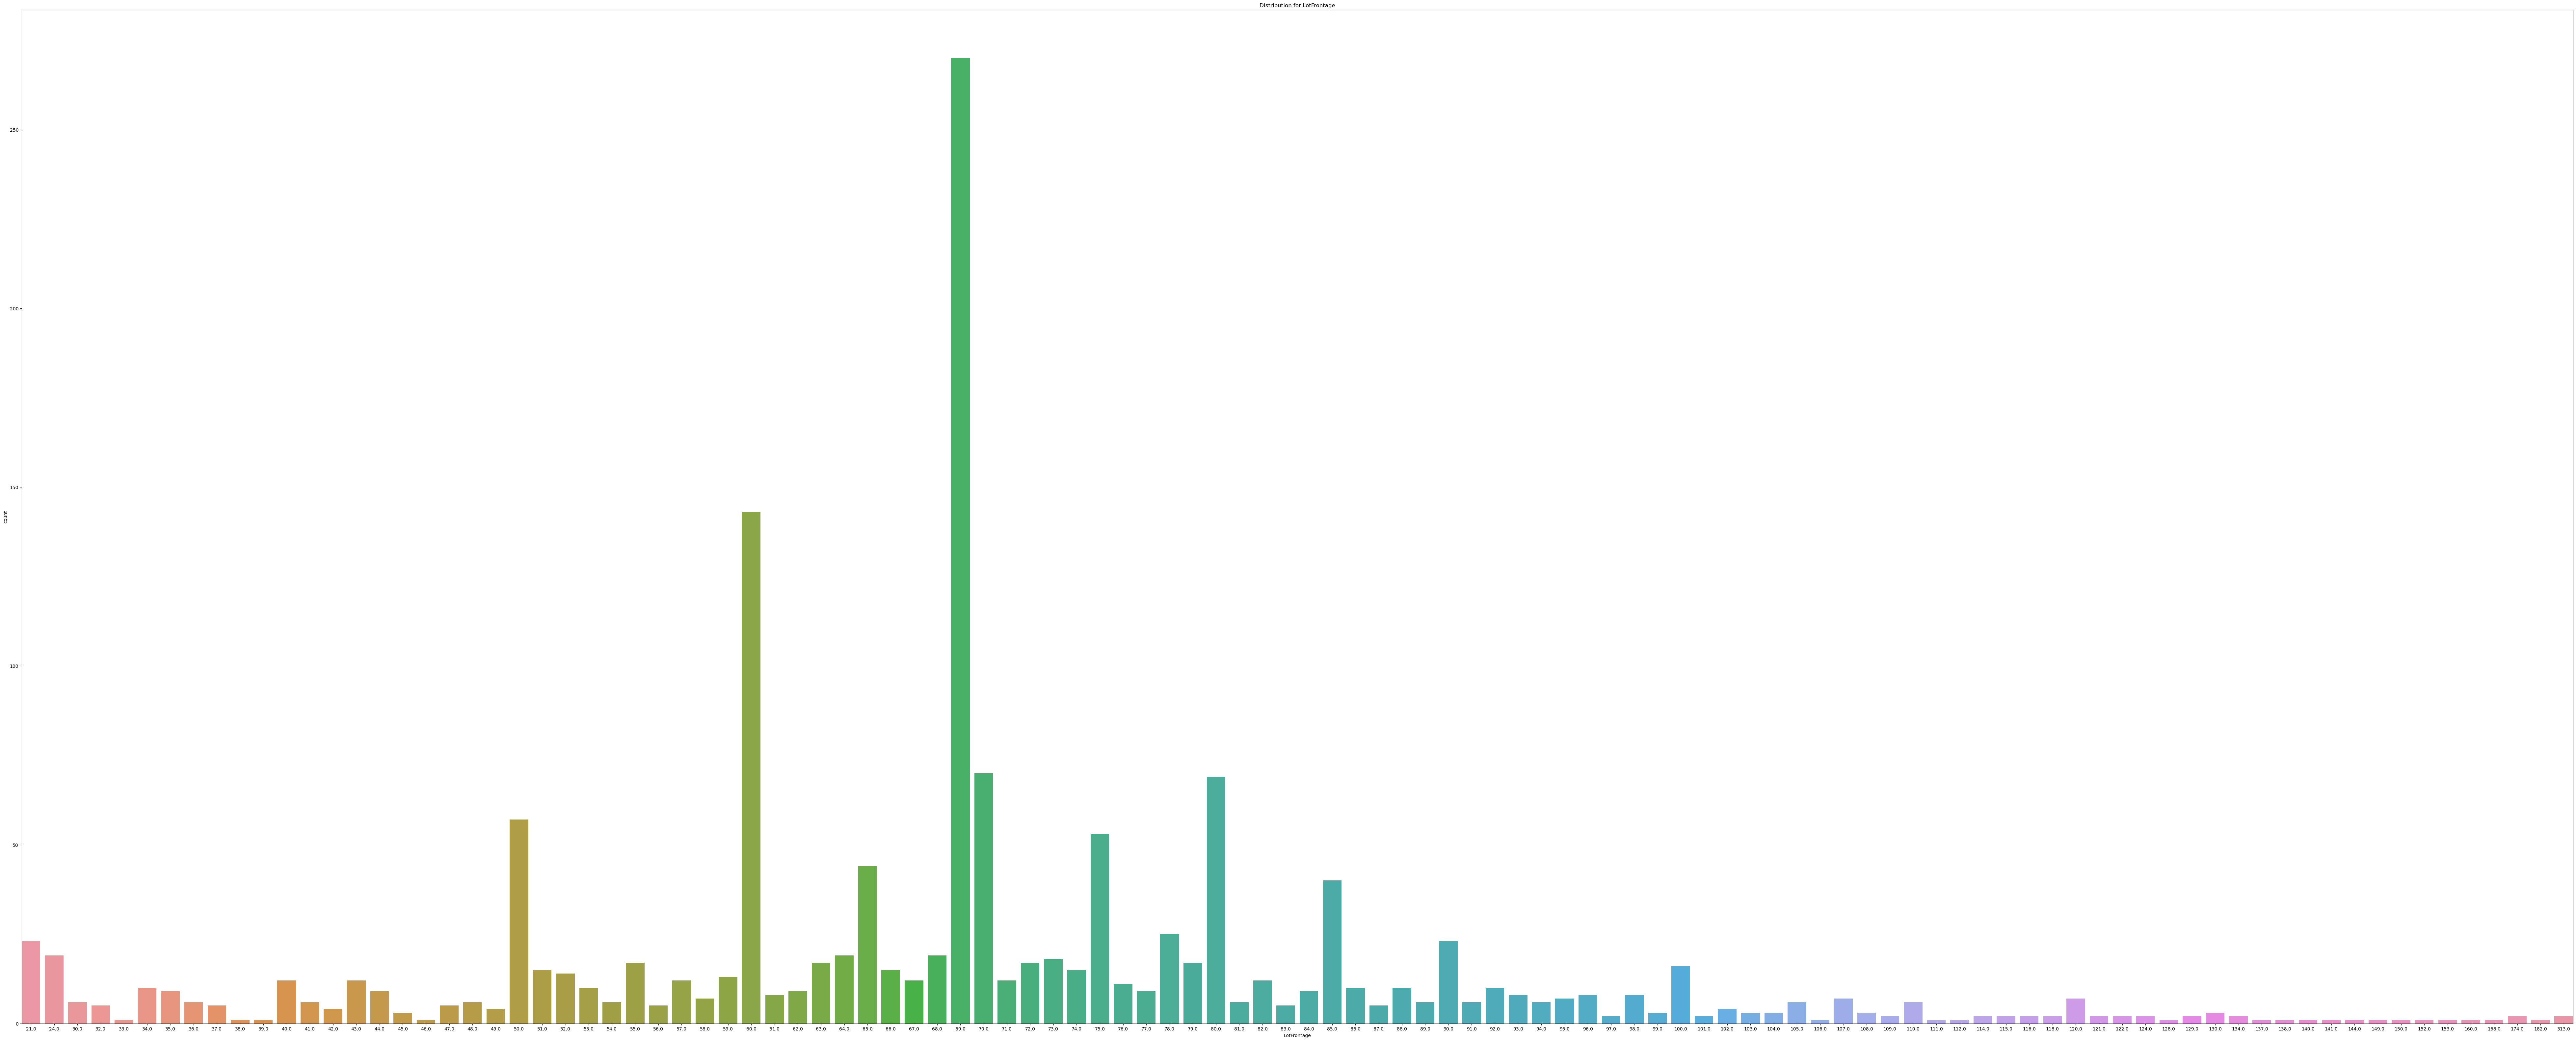

In [62]:
#plotting kernel distribution graph for the LotFrontage feature
plt.figure(figsize=(100,40))
sns.countplot(df["LotFrontage"])
plt.title('Distribution for LotFrontage')
plt.margins(x=0,tight=True)
plt.show()

#  Bi-Variate & Multi-Variate Analysis

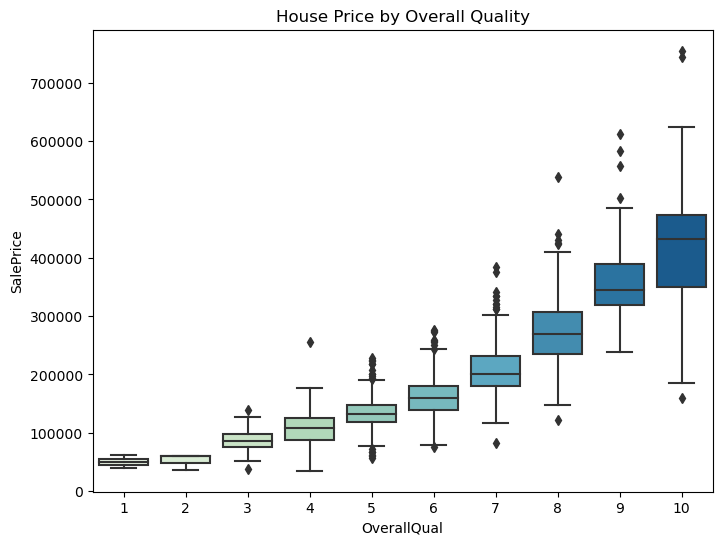

In [63]:
#Bi-variate Analysis for Sales price with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='GnBu')
title = plt.title('House Price by Overall Quality')

From the boxplot we get to know that Better the House quality is more the price of the house.and There are mosre houses

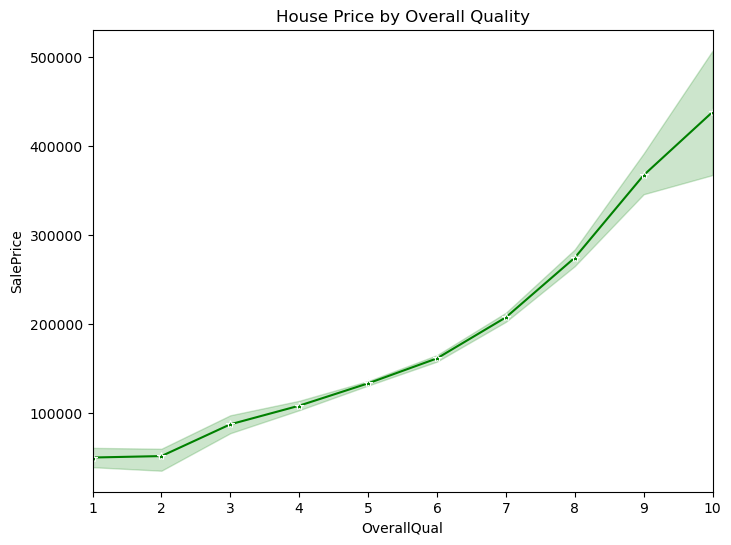

In [64]:
#Bi-variate Analysis for Sales price with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.lineplot(x='OverallQual', y='SalePrice', data=df,color='green',marker='*')
plt.margins(x=0)
title = plt.title('House Price by Overall Quality')

#  Overall Condition with Overall Quality

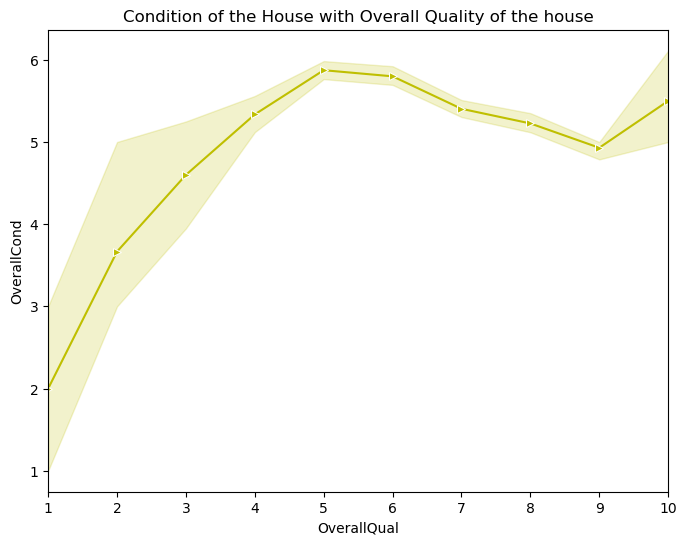

In [65]:
#Bi-variate Analysis for Overall Condition with Overall Quality of the House
plt.figure(figsize=(8, 6))
sns.lineplot(x='OverallQual', y='OverallCond', data=df,color='y',marker=">")
title = plt.title('Condition of the House with Overall Quality of the house')
plt.margins(x=0)
plt.show()

In [66]:
#crosstab for Overall Condition of the house with Quality of the House
pd.crosstab(df['OverallCond'],df['OverallQual'],margins=True)

OverallQual,1,2,3,4,5,6,7,8,9,10,All
OverallCond,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1
2,0,0,2,1,1,0,0,0,1,0,5
3,1,2,3,5,7,6,1,0,0,0,25
4,0,0,6,20,21,6,3,1,0,0,57
5,0,1,2,44,142,180,247,148,42,15,821
6,0,0,5,24,104,83,28,7,0,1,252
7,0,0,1,19,89,66,23,7,0,0,205
8,0,0,1,2,29,30,8,2,0,0,72
9,0,0,0,1,4,3,9,3,0,2,22


# The Electrical connection in types of  Houses with AirConditioning

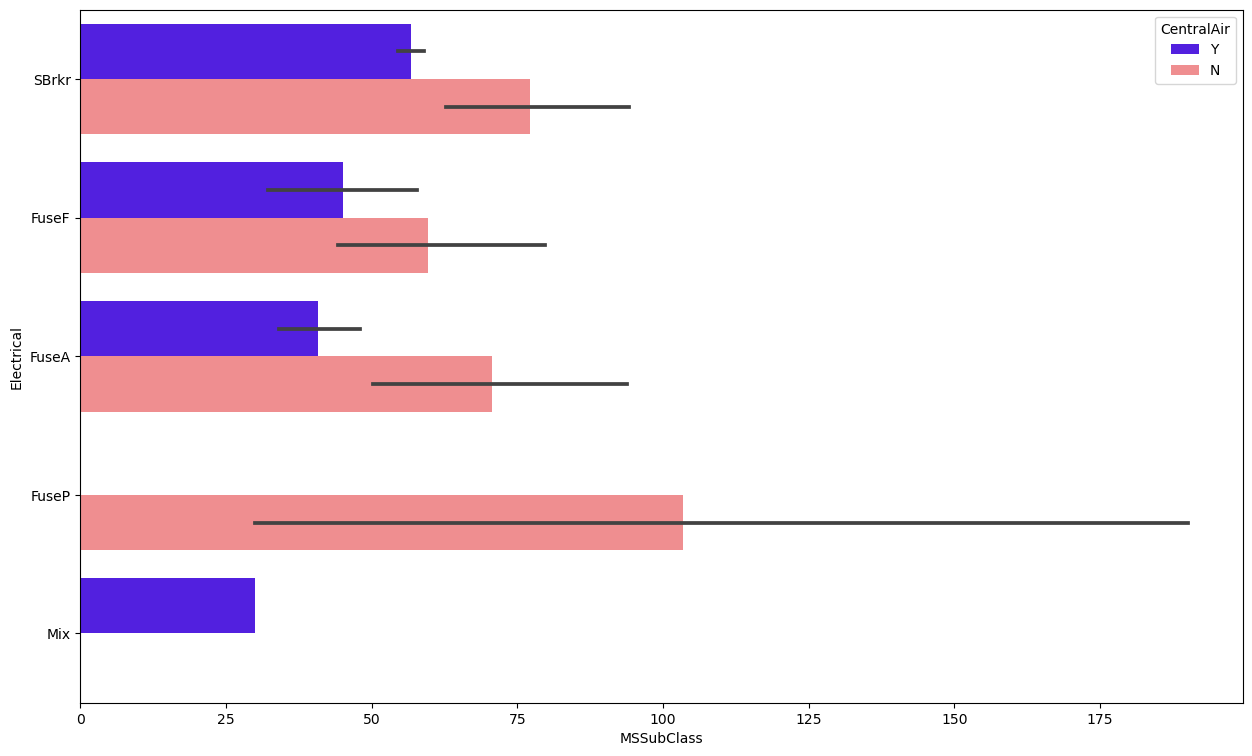

In [67]:
#PLotting BAR PLOT for Electrical connection with AirConditioning
plt.figure(figsize=(15,9))
splot=sns.barplot(y='Electrical',x='MSSubClass',hue='CentralAir',palette='gnuplot2',data=df)

plt.show()

In [68]:
#Getting all the numerical feature
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [69]:
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [70]:
#taking the only the Numerical Varibles from the dataset
num_data=df.select_dtypes(np.number)
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [71]:
#melting the Numerical Column
col=num_data.columns
mel_num=pd.melt(df,value_vars=col)
mel_num.head()

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


In [72]:
#length of the numerical columns
len(col)

37

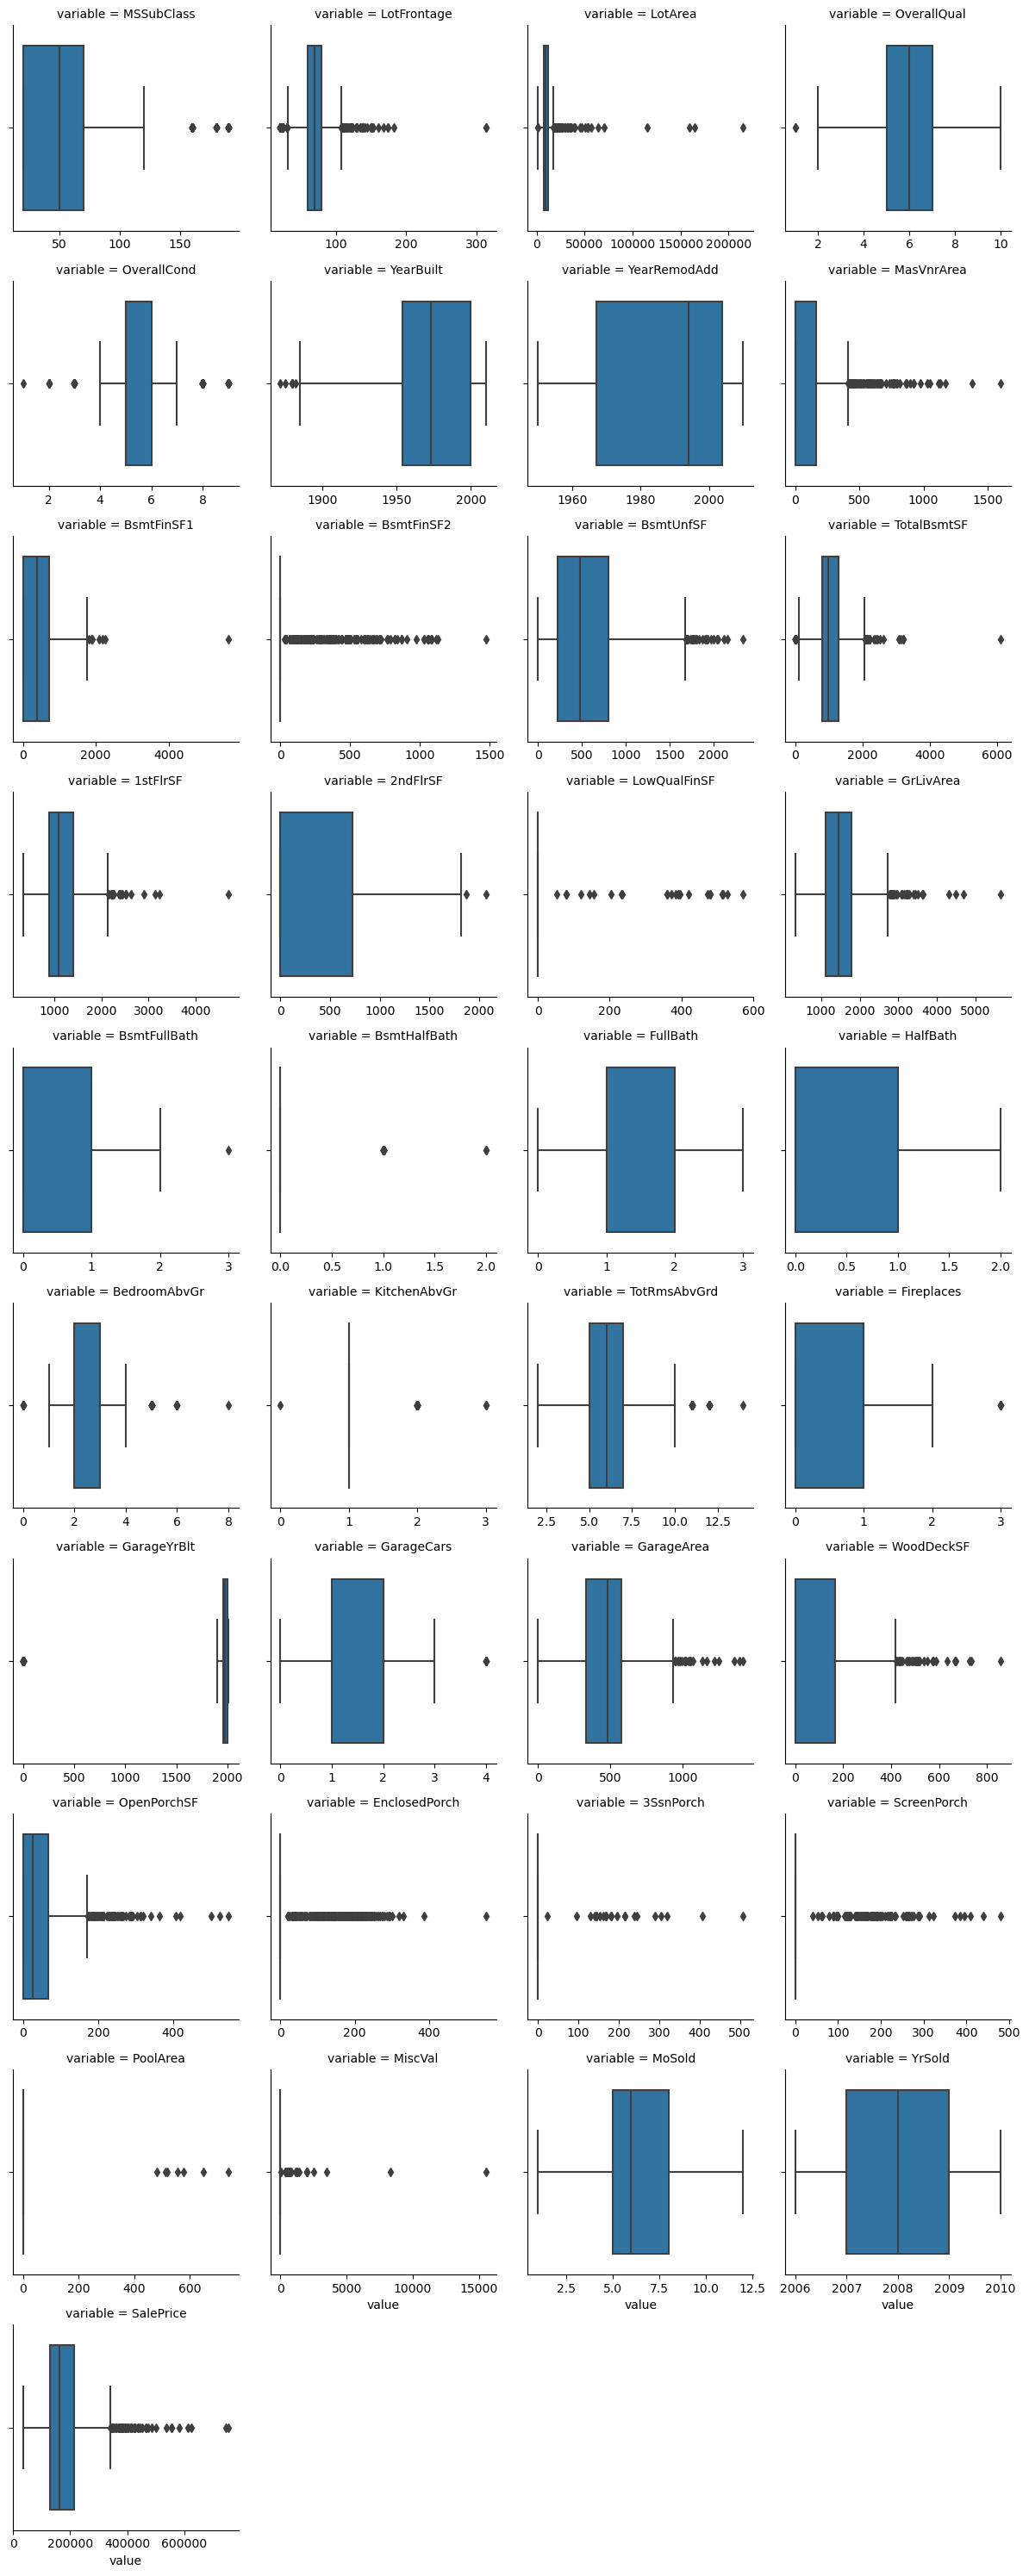

In [73]:
# Plotting Box plot for all the numerical values  in the dataete
grid=sns.FacetGrid(mel_num,col='variable',col_wrap=4,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')

In [74]:
box=df[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']]

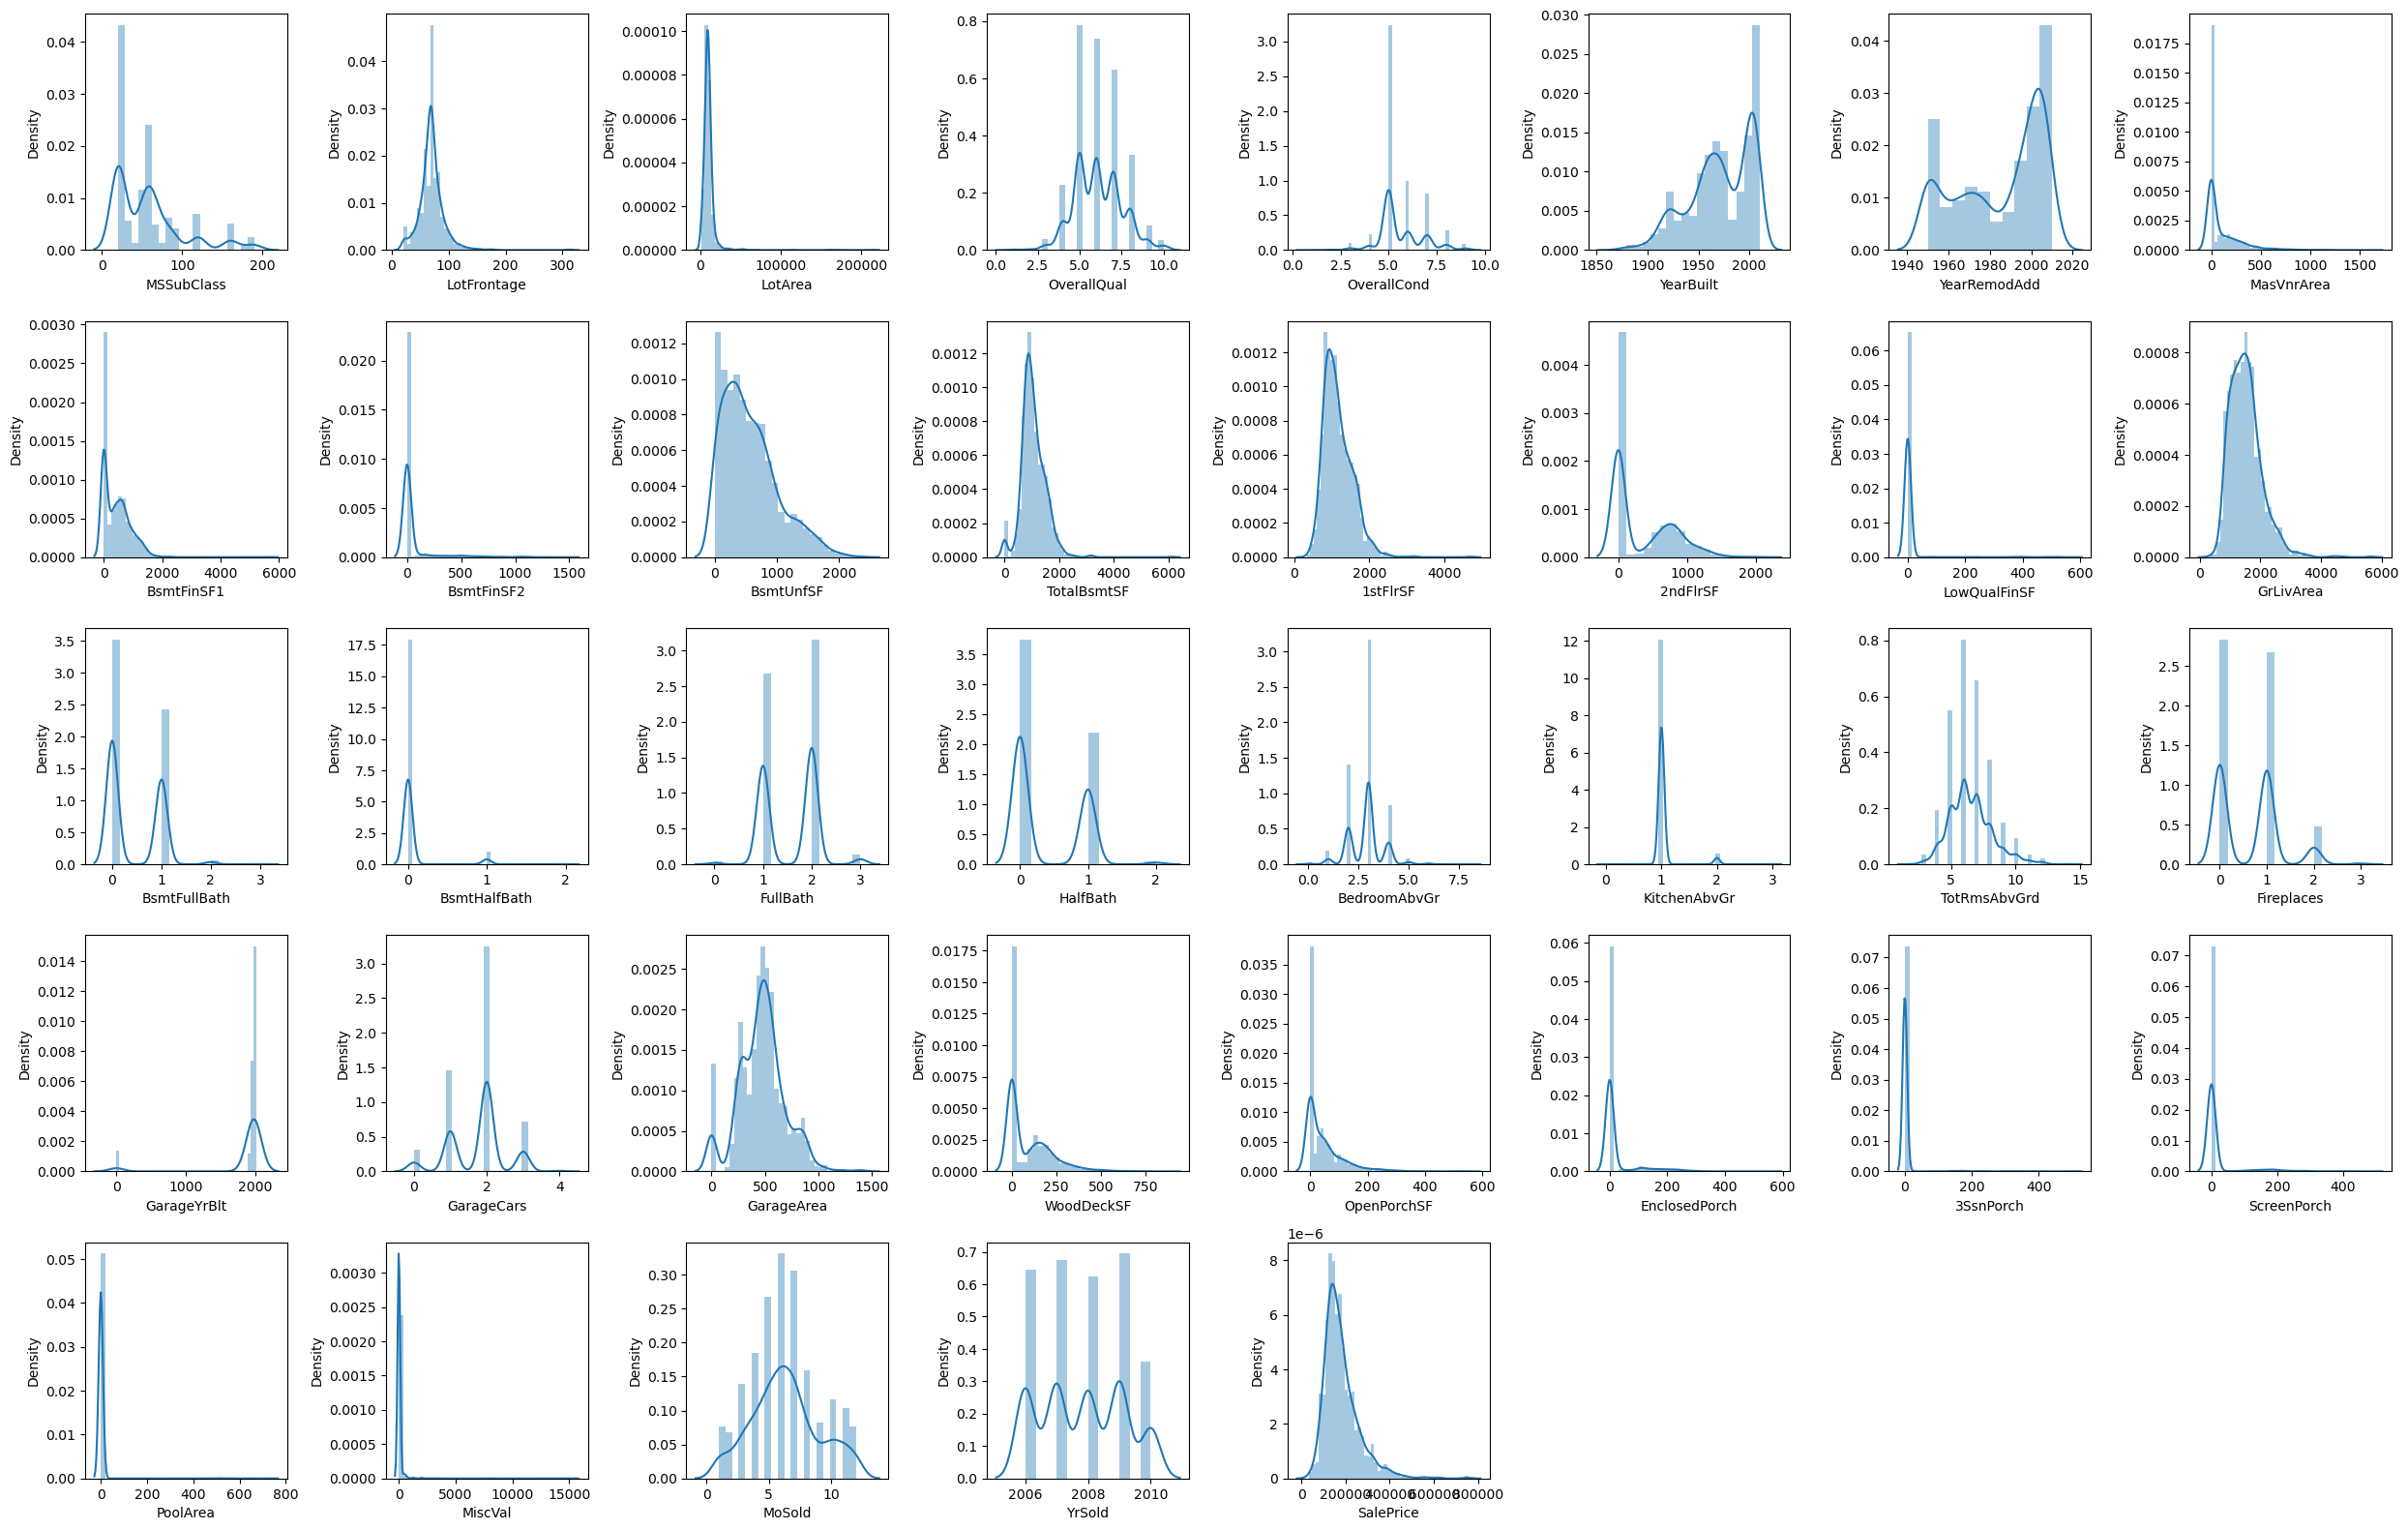

In [75]:
#plotting distribution plot for the columns
plt.figure(figsize=(25,25),facecolor='white')#canvas size

plotnum=1 #counter

for c in box:#columns form dataFrame
    if(plotnum<50):#checking whether counter less than 9
        a=plt.subplot(8,8,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   
plt.show()

In [76]:
#including only numerical values
dtype_objects = list(columns for columns in df.select_dtypes(exclude=object).columns)

In [77]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [78]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

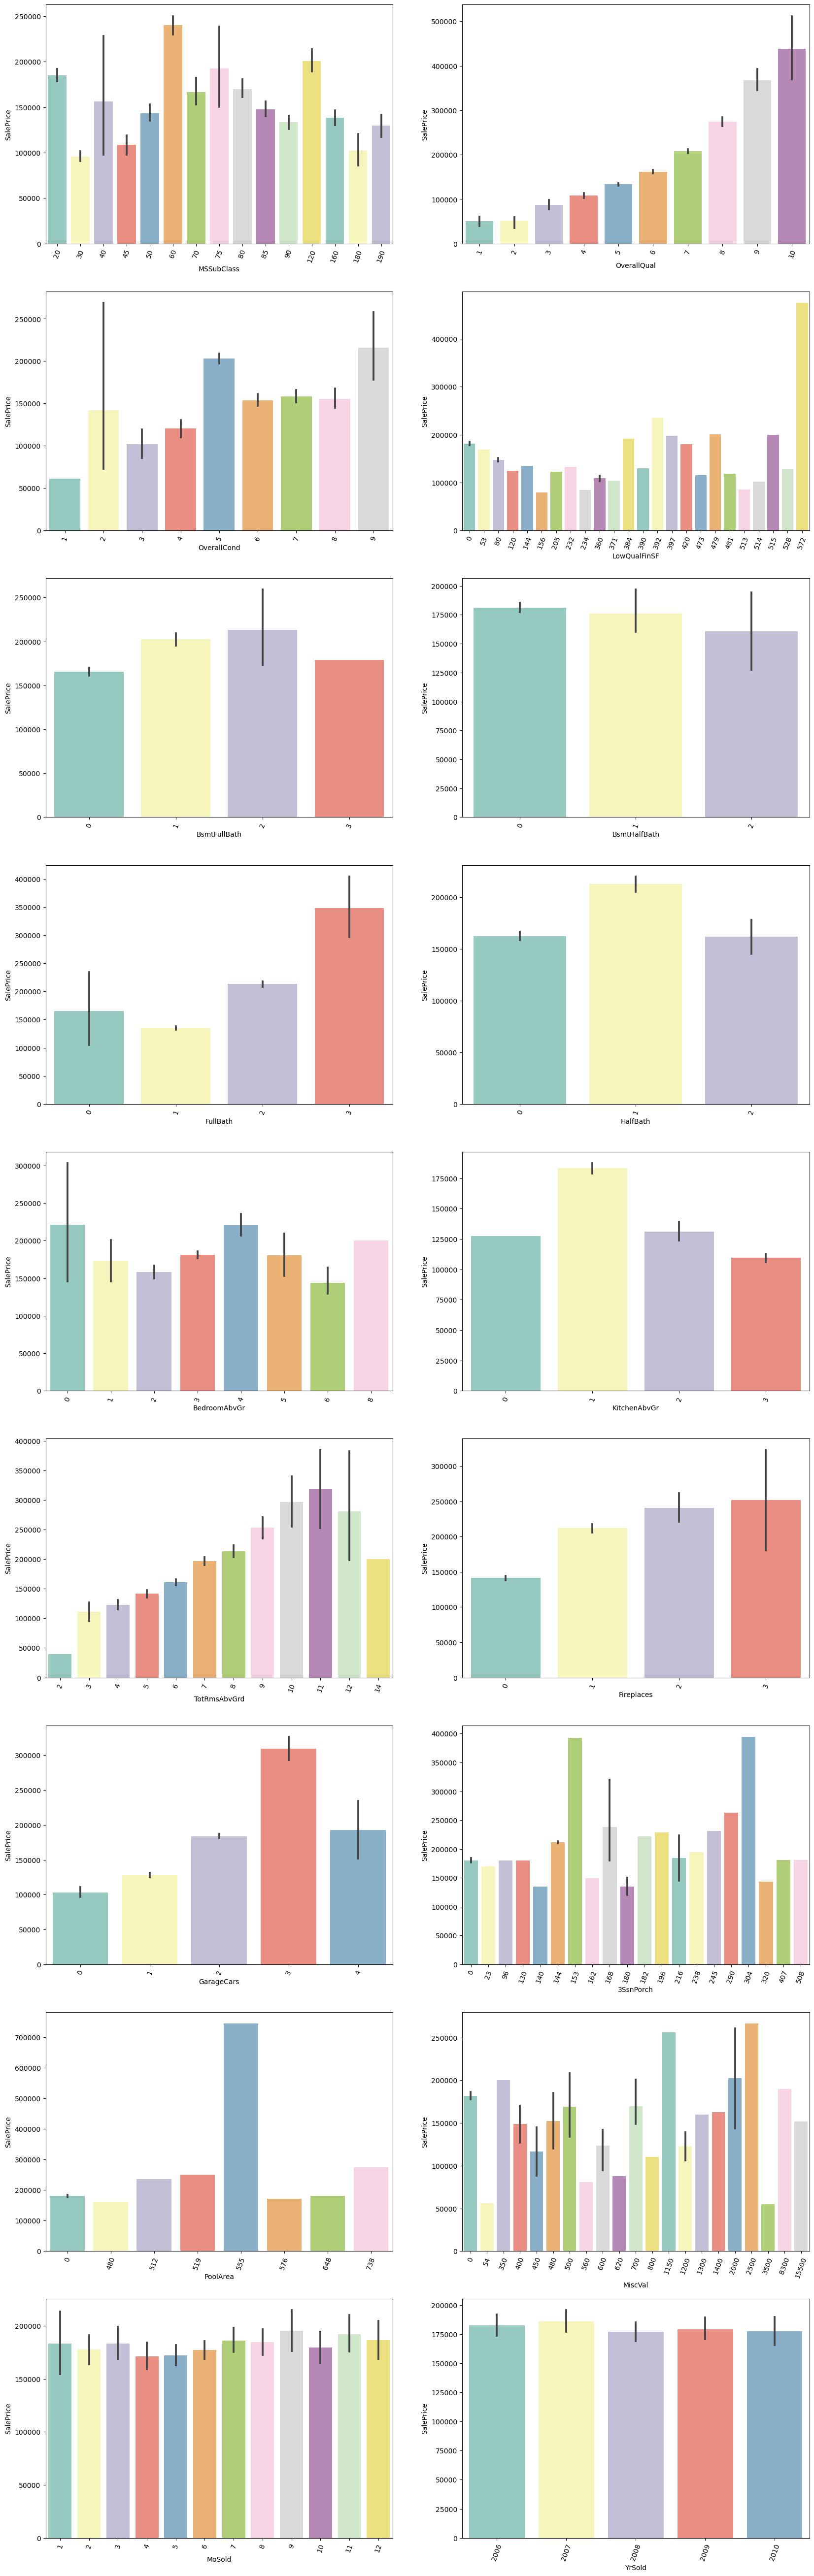

In [79]:
#Plotting count plot for all the discrete features in the dataset
plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in discrete_feature:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=df[c],y=df.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show()

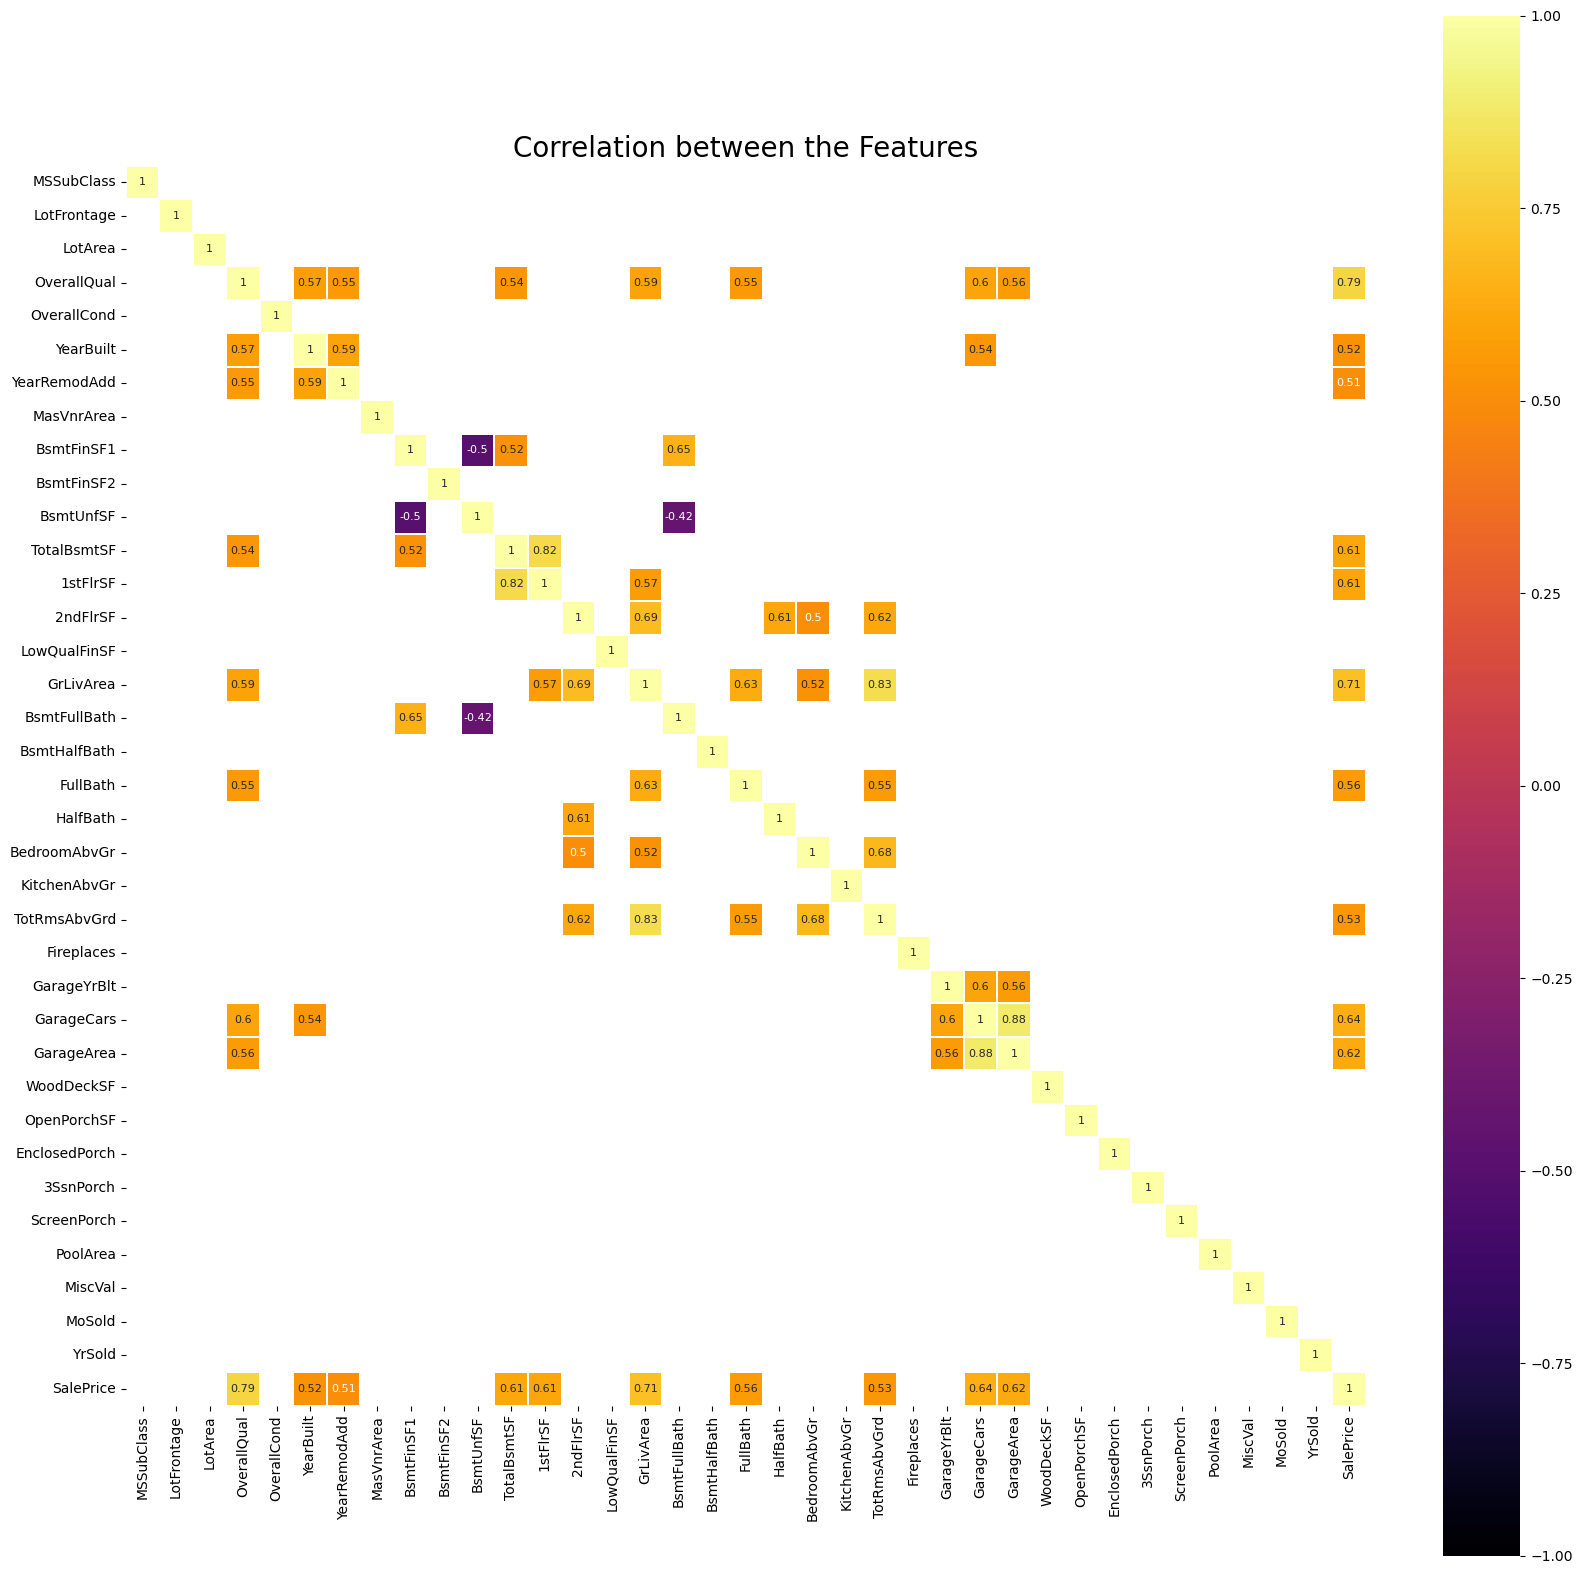

In [80]:
#plotting Heatmap 
plt.figure(figsize=(20,20))
plt.title('Correlation between the Features',fontsize=20)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Handling the Skewness

In [81]:
# finding skewed features

from scipy.stats import skew

numerical_feats = df.dtypes[df.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = df[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(10)

,skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [82]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
df[skewed_features] = np.log1p(df[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 37 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


# Label Encoding

In [83]:
#taking all the categorical feature
dfobj = df.select_dtypes(include = "object").columns
print (dfobj)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [84]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in dfobj:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# TrainTest Split
# &
# Pre-Processing

In [85]:
#Splitting data
# x variable containing all the features
x=df.drop(['SalePrice'],axis=1)
# y varaible containg only the target variable
y=df['SalePrice']

In [86]:
#using standard sclaer to scale all the datas
#by using standard scaler we can bring all the data to equal unit
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(x)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=0)

In [89]:
x_train

array([[ 0.67118773,  1.53724502, -0.30861102, ...,  0.89209459,
         0.31386709,  0.2085023 ],
       [ 0.85327902, -0.04553194,  0.12306462, ..., -0.61424198,
         0.31386709,  0.2085023 ],
       [ 0.85327902, -0.04553194,  0.12306462, ..., -1.36800417,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.01208718,  1.53724502,  0.0782286 , ...,  1.64466977,
         0.31386709,  0.2085023 ],
       [ 1.39302725, -0.04553194,  0.12306462, ..., -1.36800417,
         0.31386709,  0.2085023 ],
       [ 0.45822936, -0.04553194, -0.41414462, ...,  1.64466977,
         0.31386709,  0.2085023 ]])

In [90]:
y_train

Id
1293    3.472952
1019    3.542733
1214    3.525525
1431    3.574621
811     3.564232
          ...   
764     3.671654
836     3.503666
1217    3.480181
560     3.608801
685     3.598905
Name: SalePrice, Length: 1095, dtype: float64

# Model Building

## Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

In [93]:
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
x_train_predict=lr.predict(x_train)

In [95]:
x_test_predict=lr.predict(x_test)

In [96]:
print('Linear Regression Training Score %.2f%% '%lr.score(x_train,y_train))

Linear Regression Training Score 0.91% 


In [97]:
print('Linear Regression Testing Score %.2f%% '%lr.score(x_test,y_test))

Linear Regression Testing Score 0.79% 


### Evaluation Metric

In [98]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Root Mean Squared Error

In [99]:
RMSE_train=math.sqrt(mean_squared_error(y_train,x_train_predict))
print(RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,x_test_predict))
print(RMSE_test)

0.02088295191858392
0.03057766579362518


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
DTR=DecisionTreeRegressor()

In [102]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [103]:
DTRpred=DTR.predict(x_test)

In [104]:
DTRpred

array([3.54597569, 3.53377209, 3.50773191, 3.5989052 , 3.42717651,
       3.43553041, 3.6229779 , 3.47700581, 3.77697651, 3.56294325,
       3.55509506, 3.51300751, 3.5989052 , 3.52400989, 3.47539591,
       3.53491831, 3.61027367, 3.43035675, 3.52186536, 3.62229662,
       3.53718791, 3.52431407, 3.44154085, 3.55635884, 3.56990644,
       3.60823099, 3.55635884, 3.40915073, 3.67814687, 3.50503183,
       3.53639698, 3.57674289, 3.52400989, 3.64040388, 3.70523322,
       3.56294325, 3.63094575, 3.50672437, 3.5977252 , 3.68762393,
       3.60581752, 3.53261811, 3.57674289, 3.62023614, 3.62249652,
       3.46863294, 3.50773191, 3.50672437, 3.54152858, 3.51397882,
       3.71970408, 3.51938105, 3.54543953, 3.47700581, 3.60731598,
       3.47458527, 3.50435011, 3.59169864, 3.47539591, 3.50503183,
       3.51938105, 3.51131073, 3.51622398, 3.52792252, 3.55836156,
       3.57975365, 3.51558551, 3.60421072, 3.48406921, 3.56326756,
       3.56294325, 3.48483639, 3.40310984, 3.56132211, 3.42502

In [105]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

In [106]:
from sklearn.metrics import r2_score

In [107]:
print(r2_score(y_test,DTRpred))

0.7517590523575647


# Decision Tree Results

In [108]:
print('Decision Tree Regressor Training Score %.2f%% '%(DTR.score(x_train,y_train)*100))

Decision Tree Regressor Training Score 100.00% 


In [109]:
print('Decision Tree Regressor Testing Score %.2f%% '%(DTR.score(x_test,y_test)*100))

Decision Tree Regressor Testing Score 75.18% 


# Decision Tree Hyper Parameter Tuning

In [110]:
DTR2=DecisionTreeRegressor(max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')

In [111]:
DTR2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=3, splitter='random')

In [112]:
DTRpred2=DTR2.predict(x_train)

In [113]:
DTRpred22=DTR2.predict(x_test)

In [114]:
DTRpred2

array([3.47295241, 3.56665271, 3.52843251, ..., 3.49936168, 3.56665271,
       3.57739327])

In [115]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

# Decision Tree Hyper Parameter Tuning Results

In [116]:
print('Decision Tree after tuning Training Score %.2f%% '%(DTR2.score(x_train,y_train)*100))

Decision Tree after tuning Training Score 96.33% 


In [117]:
print('Decision Tree after tuning Testing Score %.2f%% '%(DTR2.score(x_test,y_test)*100))

Decision Tree after tuning Testing Score 75.14% 


### Evaluation Metric

#### Root Mean Squared Error

In [118]:
RMSE_train=math.sqrt(mean_squared_error(y_train,DTRpred2))
print(RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,DTRpred22))
print(RMSE_test)

0.013503978541207155
0.03347126624478579


# Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [121]:
prediction1=rfr.predict(x_train)

In [122]:
prediction2=rfr.predict(x_test)

In [123]:
prediction1

array([3.48633261, 3.54752313, 3.50309002, ..., 3.49295042, 3.59619303,
       3.59566304])

In [124]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

# Random Forest Results

In [125]:
print('Random Forest Training Score %.2f%% '%(rfr.score(x_train,y_train)*100))

Random Forest Training Score 98.20% 


In [126]:
print('Random Forest Testing Score %.2f%% '%(rfr.score(x_test,y_test)*100))

Random Forest Testing Score 88.27% 


In [127]:
r2_score(y_test,prediction2)

0.882668810210372

# Random Forest Hyper Parameter Tuning

In [128]:
rfr2=RandomForestRegressor(n_estimators=700,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=30)

In [129]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=700)

In [130]:
prediction22=rfr2.predict(x_train)

In [131]:
prediction2=rfr2.predict(x_test)

# Random Forest Hyper Parameter Tuning Results

In [132]:
print('Random Forest after tuning Training Score %.2f%% '%(rfr2.score(x_train,y_train)*100))

Random Forest after tuning Training Score 98.18% 


In [133]:
print('Random Forest after tuning Testing Score %.2f%% '%(rfr2.score(x_test,y_test)*100))

Random Forest after tuning Testing Score 88.54% 


### Root Mean Squared Error

In [134]:
import math

In [135]:
RMSE_train=math.sqrt(mean_squared_error(y_train,prediction22))
print('RMSE Training Score for Random Forest after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,prediction2))
print('RMSE Test Score for Random Forest after tuning',RMSE_test)

RMSE Training Score for Random Forest after tuning 0.009499488559283576
RMSE Test Score for Random Forest after tuning 0.02272716507207887


# Gradient Boosting

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [137]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [138]:
gbrpred=gbr.predict(x_test)

In [139]:
gbrpred

array([3.57517003, 3.53230768, 3.47761595, 3.59633741, 3.44270385,
       3.43477133, 3.62654819, 3.49997349, 3.72566379, 3.53265289,
       3.57300497, 3.52326138, 3.60711828, 3.50575055, 3.49107623,
       3.52183424, 3.60757373, 3.48676267, 3.51774939, 3.56400824,
       3.48515131, 3.52039022, 3.46624706, 3.54522454, 3.56919025,
       3.57137925, 3.54977362, 3.41243917, 3.67476274, 3.48171439,
       3.50837669, 3.58578726, 3.52401785, 3.64571301, 3.66020033,
       3.57298448, 3.64337891, 3.4891678 , 3.60611535, 3.67333971,
       3.59544918, 3.49183291, 3.57061328, 3.65223517, 3.67807856,
       3.51055346, 3.50886446, 3.50997646, 3.55041172, 3.45153618,
       3.70947255, 3.52592783, 3.54497568, 3.42604057, 3.60882282,
       3.46836087, 3.49322413, 3.61469998, 3.51411455, 3.46598707,
       3.51324542, 3.5097566 , 3.51772715, 3.55098059, 3.58386632,
       3.54123648, 3.50640216, 3.59105794, 3.491596  , 3.57951013,
       3.5625043 , 3.49033293, 3.41304165, 3.60610109, 3.42510

In [140]:
y_test

Id
530     3.582128
492     3.510390
460     3.477006
280     3.574495
656     3.437557
          ...   
584     3.665429
1246    3.561322
1391    3.609539
1376    3.612458
639     3.431404
Name: SalePrice, Length: 365, dtype: float64

In [141]:
print(r2_score(y_test,gbrpred))

0.895496219292511


# Gradient Boosting Results

In [142]:
print('Gradient Boosting Training Score %.2f%% '%(gbr.score(x_train,y_train)*100))

Gradient Boosting Training Score 96.42% 


In [143]:
print('Gradient Boosting Testing Score %.2f%% '%(gbr.score(x_test,y_test)*100))

Gradient Boosting Testing Score 89.55% 


# Gradient Boosting Hyper Parameter Tuning

In [144]:
GBR2=GradientBoostingRegressor(n_estimators=700,min_samples_split=100,min_samples_leaf=2,max_features='sqrt',max_depth=20)

In [145]:
GBR2.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=100, n_estimators=700)

In [146]:
predictGBR2=GBR2.predict(x_train)

In [147]:
predictGBR22=GBR2.predict(x_test)

# Gradient Boosting Hyper Parameter Tuning Results

In [148]:
print('Gradient Boosting Training Score %.2f%% '%(GBR2.score(x_train,y_train)*100))

Gradient Boosting Training Score 100.00% 


In [149]:
print('Gradient Boosting Testing Score %.2f%% '%(GBR2.score(x_test,y_test)*100))

Gradient Boosting Testing Score 87.59% 


### Root Mean Squared Error

In [150]:
RMSE_train=math.sqrt(mean_squared_error(y_train,predictGBR2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,predictGBR22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

RMSE Training Score for Gradient Boosting after tuning 0.0002569928982017299
RMSE Test Score for Gradient Boosting after tuning 0.023651588101590404


# Xtreme Gradient Boosting

In [151]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_r = XGBRegressor()

#xgb_r= XGBRegressor() ## object creation
xgb_r.fit(x_train,y_train)# fitting the data
xgbrpred22=xgb_r.predict(x_test)#predicting the price
xgbrpred2=xgb_r.predict(x_train)

# Xtreme Gradient Boosting Results

In [ ]:
print('Gradient Boosting Training Score %.2f%% '%(xgb_r.score(x_train,y_train)*100))

In [ ]:
print('Gradient Boosting Testing Score %.2f%% '%(xgb_r.score(x_test,y_test)*100))

In [ ]:
r2_score(y_test,xgbrpred22)#R2 score

In [ ]:
r2_score(y_test,predictGBR22)

In [ ]:
predictGBR2=GBR2.predict(x_train)

In [ ]:
predictGBR22=GBR2.predict(x_test)

### Root Mean Squared Error

In [ ]:
RMSE_train=math.sqrt(mean_squared_error(y_train,xgbrpred2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,xgbrpred22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

# Xtreme Gradient Boosting Hyper Parameter Tuning

In [ ]:
XGB2=XGBRegressor(subsample=1,n_estimators=600, max_depth= 3,learning_rate= 0.1, gamma=0,colsample_bytree= 0.5)

In [ ]:
XGB2.fit(x_train,y_train)

In [ ]:
XGBpred22=XGB2.predict(x_test)
XGBpred2=XGB2.predict(x_train)

In [ ]:
XGBpred22

In [ ]:
y_test

# Xtreme Gradient Boosting after Tuning Results

In [ ]:
(print('Extreme Gradient Boosting after tuning Training Score %.2f%% '%(XGB2.score(x_train,y_train)*100)))

In [ ]:
(print('Extreme Gradient Boosting after tuning Testing Score %.2f%% '%(XGB2.score(x_test,y_test)*100)))

In [ ]:
r2_score(y_test,XGBpred22)#R2 score

### Root Mean Squared Error

In [ ]:
RMSE_train=math.sqrt(mean_squared_error(y_train,XGBpred2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,XGBpred22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

# XGB |Tuning*2

In [ ]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
XGB3=XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=4,
                               monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [ ]:
XGB3.fit(x_train,y_train)

# Xtreme Gradient Boosting after Tuning *2 Results

In [ ]:
(print('Extreme Gradient Boosting after tuning Training Score %.2f%% '%(XGB3.score(x_train,y_train)*100)))

In [ ]:
(print('Extreme Gradient Boosting after tuning Testing Score %.2f%% '%(XGB3.score(x_test,y_test)*100)))

### Root Mean Squared Error

In [ ]:
XGBpred3=XGB3.predict(x_train)
XGBpred33=XGB3.predict(x_test)

In [ ]:
RMSE_train=math.sqrt(mean_squared_error(y_train,XGBpred3))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,XGBpred33))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

In [ ]:
! pip install lightgbm

# Light Gradient Boosted Machine

In [ ]:
# light gradient boosting
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train)

## Light Gradient Boosted Machine Result

In [ ]:
(print('Light Gradient Boosting Training Score %.2f%% '%(model_lgb.score(x_train,y_train)*100)))

In [ ]:
(print('Light Gradient Boosting Testing Score %.2f%% '%(model_lgb.score(x_test,y_test)*100)))

### Root Mean Squared Error

In [ ]:
modellgb2=model_lgb.predict(x_train)
modellgb22=model_lgb.predict(x_test)

In [ ]:
RMSE_train=math.sqrt(mean_squared_error(y_train,modellgb2))
print('RMSE Training Score for Gradient Boosting after tuning',RMSE_train)
RMSE_test=math.sqrt(mean_squared_error(y_test,modellgb22))
print('RMSE Test Score for Gradient Boosting after tuning',RMSE_test)

# Important Feature

In [ ]:
#importing the Extra tree regressor 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

In [ ]:
#plotting a graph to visualize the important feature which affects the Salary
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
#to got the top 20 important features
((feat_importances.nlargest(20))*100).plot(kind='barh',color='g')
plt.show()

# <span style='font-family:Georgia'>Conclusion

### <span style='font-family:Georgia'>1. After trying all the possible Regression Algorithm we get a Good R2 Score(ie.Accuracy Score) afte Hyper Parameter tuning the Extreme Gradient Boosting Algorithm.
### <span style='font-family:Georgia'>2.The Most important Feature here is the 'OverallQual' which is the Overall Quality of the house . This is the most influencing factor for 'SalePrice' of the House which is  Price of the House.
### <span style='font-family:Georgia'>3.The 'OverallQual' is an Ordinal Value with a range from 1-10 where 1 is the for Very Poor Qulaity House  and 10 is for Excellent.